# <font color="#034508">Spotify Most Streamed Songs in 2023</font>

<font size="4" color="#0b8738">Findings:</font>


<ul>
  <li>Bad Bunny and Taylor Swift are the artists with the most tracks in the most streamed tracks list.</li>
  <li>Bad Bunny and the Weekend are the artists with the most streams on Spotify in 2023.</li>
  <li>‘Blinding Lights’ and ‘Shape of You’ are the most streamed songs in 2023 on Spotify.</li>
  <li>C# the most used key among the most streamed songs in 2023 on Spotify.</li>
  <li>The most used mode of the songs is ‘Major’.</li>
  <li>The newer the song, the more streams it has in 2023. Most of the song in the list has been released in 2022 and 2021.</li>
  <li>There is an upward trend in danceability, valence, energy, and speechiness of the songs in the list based on their release year.</li>
  <li>The average BPM of the top 10 streamed songs are higher than the rest of the subsets and it is higher than the average of all of the songs in the lists.</li>
    <li>Among the 10 most streamed artists, Eminem has the most danceable songs on average.</li>
  <li>The BPM of Taylor Swift songs (in the most streamed songs list) decreased over the time.</li>
  <li>The key which is used the most for Taylor Swift songs in the Spotify list is G.</li>
</ul>

<p>In this project, these steps have been completed:</p>
<ul>
  <li>Data Wrangling</li>
  <li>Data Exploration</li>
  <li>Visualization</li>
</ul>

The data used in this project is from a dataset on Kaggle which has used Spotify API. 

# <font color="#82077e">Collect, Wrangle & Explore Data</font>

In [69]:
#import necessary libraries and the data from the local

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


df = pd.read_csv(r'C:\Users\Kimiya\Documents\Datasources\SpotifyData\spotify-2023.csv',encoding='latin1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [71]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
released_year,953.0,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
released_day,953.0,13.930745,9.201949,1.0,6.0,13.0,22.0,31.0
in_spotify_playlists,953.0,5200.124869,7897.608990,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_charts,953.0,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
in_apple_playlists,953.0,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0
in_apple_charts,953.0,51.908709,50.630241,0.0,7.0,38.0,87.0,275.0
in_deezer_charts,953.0,2.666317,6.035599,0.0,0.0,0.0,2.0,58.0
bpm,953.0,122.540399,28.057802,65.0,100.0,121.0,140.0,206.0


In [73]:
df.describe(include=['O']).T

,count,unique,top,freq
track_name,953,943,Daylight,2
artist(s)_name,953,645,Taylor Swift,34
streams,953,949,723894473,2
in_deezer_playlists,953,348,0,24
in_shazam_charts,903,198,0,344
key,858,11,C#,120
mode,953,2,Major,550


In [74]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [75]:
#fill the empty values in this column with 0
df['in_shazam_charts'].fillna(0)

0      826
1      382
2      949
3      548
4      425
      ... 
948      0
949      0
950      0
951      0
952      0
Name: in_shazam_charts, Length: 953, dtype: object

In [76]:
# create a release date column from the combination of the dateparts columns so the date is easier to read.
df['release_date'] = pd.to_datetime(df[['released_year', 'released_month', 'released_day']].astype(str).agg('-'.join, axis=1))
df['release_date']

0     2023-07-14
1     2023-03-23
2     2023-06-30
3     2019-08-23
4     2023-05-18
         ...    
948   2022-11-03
949   2022-10-21
950   2022-11-03
951   2022-10-20
952   2022-11-04
Name: release_date, Length: 953, dtype: datetime64[ns]

<font color="blue">The streams column has an object data type and needs to be converted to a numerical type to be used in analysis, but it looks like there is an error there: </font>


In [77]:
# Use pd.to_numeric with errors='coerce' to convert the column to numeric values
numeric_column = pd.to_numeric(df['streams'], errors='coerce')

# Find rows where 'column_name' contains non-numeric values (i.e., NaN values)
string_rows = df[numeric_column.isna()]

# 'string_rows' now contains the rows where 'column_name' has non-numeric values
string_rows

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,A,Major,53,75,69,7,0,17,3,1970-01-01


<font color="blue">Let's exclude the row above and then convert the streams column from object to integer: </font> 

In [79]:
df = df[df['track_name'] != "Love Grows (Where My Rosemary Goes)"]
df.shape

(952, 25)

In [80]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['streams']

0      141381703
1      133716286
2      140003974
3      800840817
4      303236322
         ...    
948     91473363
949    121871870
950     73513683
951    133895612
952     96007391
Name: streams, Length: 952, dtype: int64

In [199]:
# remove duplicate tracks
df.drop_duplicates(subset='track_name', inplace=True)

# split the name of the artists in the artist(s)_name column to create an exploded df to use for analysis on the artists level.
df['artist(s)_name'] = df["artist(s)_name"].str.split(', ')

In [17]:
#create a dataframe with only one artist in the artist(s)_name column for each row
exploded_df = df.explode('artist(s)_name')
exploded_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,Seven (feat. Latto) (Explicit Ver.),Latto,2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,2023-07-14
0,Seven (feat. Latto) (Explicit Ver.),Jung Kook,2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,2019-08-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,A Veces (feat. Feid),Paulo Londra,2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,2022-11-03
951,En La De Ella,Feid,3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,2022-10-20
951,En La De Ella,Sech,3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,2022-10-20
951,En La De Ella,Jhayco,3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,2022-10-20


# <font color="#82077e">Analyze & Visualization: Data Analysis</font>

# <font color="blue">Who are the top 10 singer with the most tracks in the list?</font>

In [18]:
count_of_tracks_df = exploded_df.groupby("artist(s)_name")["track_name"].nunique().reset_index().rename(columns = {'artist(s)_name':'artist_name', 'track_name': 'count_of_tracks'}).sort_values(by= 'count_of_tracks', ascending = False)
count_of_tracks_df

,artist_name,count_of_tracks
66,Bad Bunny,40
606,Taylor Swift,38
626,The Weeknd,36
318,Kendrick Lamar,23
543,SZA,23
...,...,...
268,James Blake,1
266,Jain,1
264,Jack Black,1
262,JISOO,1


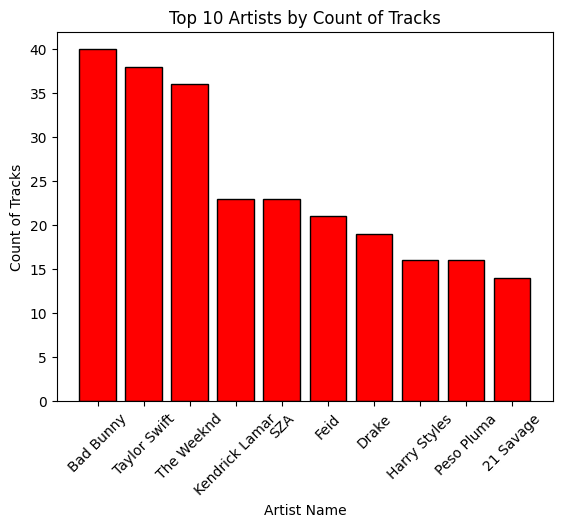

In [167]:
top_10 = count_of_tracks_df.head(10)
plt.bar(top_10['artist_name'],top_10['count_of_tracks'],color = 'red', edgecolor = 'black')
plt.xlabel('Artist Name')
plt.ylabel('Count of Tracks')
plt.title('Top 10 Artists by Count of Tracks')
plt.xticks(rotation=45)
plt.show()

# <font color="blue">Who are the top 10 most streamed artists?</font>

In [20]:
count_of_streams_df = exploded_df.groupby("artist(s)_name")["streams"].sum().reset_index().sort_values(by= 'streams', ascending = False)
count_of_streams_df['streams'] = round(count_of_streams_df['streams'] / 1e9 , 2)
count_of_streams_df

,artist(s)_name,streams
66,Bad Bunny,23.81
626,The Weeknd,23.50
185,Ed Sheeran,15.32
606,Taylor Swift,14.63
244,Harry Styles,11.32
...,...,...
633,Toian,0.03
70,Beam,0.03
140,DJ 900,0.01
578,Sog,0.01


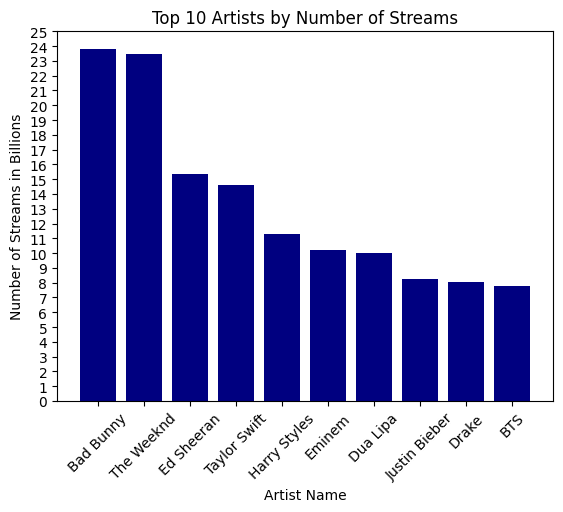

In [21]:
top_10_artists_streams = count_of_streams_df.head(10)
plt.bar(top_10_artists_streams['artist(s)_name'],top_10_artists_streams['streams'],color = 'navy')
plt.xlabel('Artist Name')
plt.ylabel('Number of Streams in Billions')
plt.title('Top 10 Artists by Number of Streams')
plt.xticks(rotation=45)
plt.yticks(range(26))
plt.show()

# <font color="blue"> What are the top 10 most streamed Tracks?</font>

In [22]:
unique_tracks_df = df.sort_values(by='streams', ascending = False)
#convert the number of streams to Billions so the number becomes easier to read.
unique_tracks_df['streams']= round(unique_tracks_df['streams'] / 1e9 , 2)
top_10_tracks = unique_tracks_df.head(10)
top_10_tracks

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
55,Blinding Lights,[The Weeknd],1,2019,11,29,43899,69,3.70,672,...,C#,Major,50,38,80,0,0,9,7,2019-11-29
179,Shape of You,[Ed Sheeran],1,2017,1,6,32181,10,3.56,33,...,C#,Minor,83,93,65,58,0,9,8,2017-01-06
86,Someone You Loved,[Lewis Capaldi],1,2018,11,8,17836,53,2.89,440,...,C#,Major,50,45,41,75,0,11,3,2018-11-08
620,Dance Monkey,[Tones and I],1,2019,5,10,24529,0,2.86,533,...,F#,Minor,82,54,59,69,0,18,10,2019-05-10
41,Sunflower - Spider-Man: Into the Spider-Verse,"[Post Malone, Swae Lee]",2,2018,10,9,24094,78,2.81,372,...,D,Major,76,91,50,54,0,7,5,2018-10-09
162,One Dance,"[Drake, WizKid, Kyla]",3,2016,4,4,43257,24,2.71,433,...,C#,Major,77,36,63,1,0,36,5,2016-04-04
84,STAY (with Justin Bieber),"[Justin Bieber, The Kid Laroi]",2,2021,7,9,17050,36,2.67,492,...,C#,Major,59,48,76,4,0,10,5,2021-07-09
140,Believer,[Imagine Dragons],1,2017,1,31,18986,23,2.59,250,...,A#,Minor,77,74,78,4,0,23,11,2017-01-31
725,Closer,"[The Chainsmokers, Halsey]",2,2016,5,31,28032,0,2.59,315,...,G#,Major,75,64,52,41,0,11,3,2016-05-31
48,Starboy,"[The Weeknd, Daft Punk]",2,2016,9,21,29536,79,2.57,281,...,G,Major,68,49,59,16,0,13,28,2016-09-21


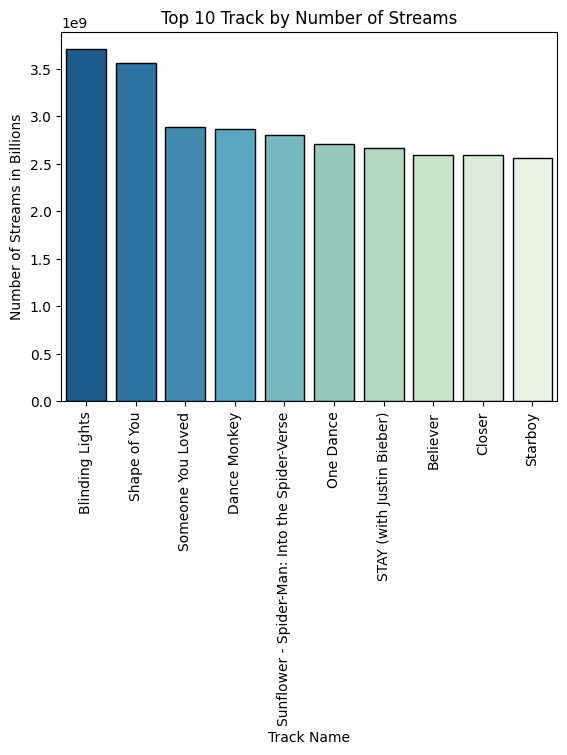

In [168]:
sns.barplot(x = 'track_name',
            y = 'streams',
            data = top_10_tracks,
            palette='GnBu_r',
            edgecolor = 'black'
           )
plt.xlabel('Track Name')
plt.ylabel('Number of Streams in Billions')
plt.title('Top 10 Track by Number of Streams')
plt.xticks(rotation=90)
plt.show()

# <font color="blue"> How is the distribution of keys and modes among the songs in the list?</font>

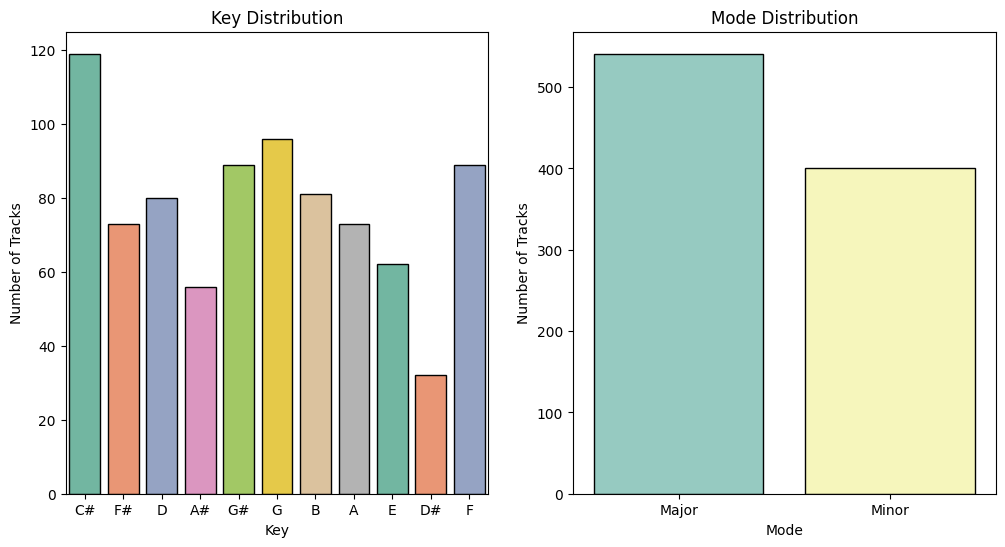

In [174]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.countplot(x = 'key',
              data = unique_tracks_df,
              palette='Set2',
             edgecolor = 'black')
plt.xlabel('Key')
plt.ylabel('Number of Tracks')
plt.title('Key Distribution')

plt.subplot(1,2,2)
sns.countplot(x = 'mode',
              data = unique_tracks_df,
              palette='Set3',
             edgecolor = 'black')
plt.xlabel('Mode')
plt.ylabel('Number of Tracks')
plt.title('Mode Distribution')

plt.show()

# <font color="blue"> How is the distribution of release year of the songs in the list?</font>

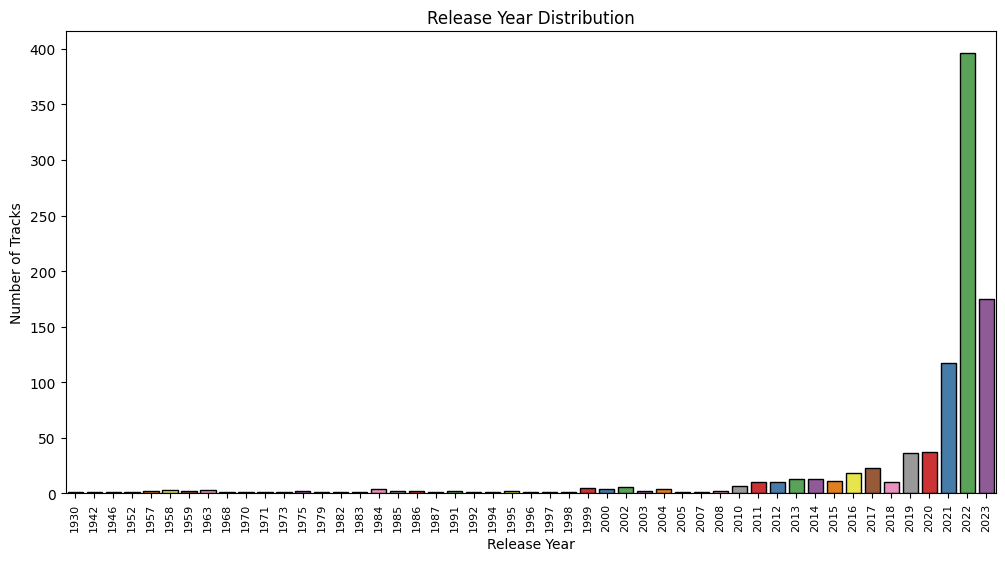

In [200]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'released_year',
              data = unique_tracks_df,
              palette='Set1',
              edgecolor = 'black')
plt.xlabel('Release Year')
plt.ylabel('Number of Tracks')
plt.title('Release Year Distribution')
plt.xticks(rotation = 90, fontsize = 8)
plt.show()

# <font color="blue"> Top 10 Artists by playlist appearance (Spotify)</font>

In [27]:
spot_play = exploded_df.groupby('artist(s)_name')['in_spotify_playlists'].sum().reset_index()
sorted_spot_play = spot_play.sort_values(by = 'in_spotify_playlists', ascending = False)
sorted_spot_play

,artist(s)_name,in_spotify_playlists
626,The Weeknd,226687
196,Eminem,155091
185,Ed Sheeran,142877
606,Taylor Swift,137766
66,Bad Bunny,137562
...,...,...
566,Shilpa Rao,130
108,Caralisa Monteiro,130
132,Colde,105
567,Shubh,67


In [28]:
top_10_spot_pl = sorted_spot_play.head(10)

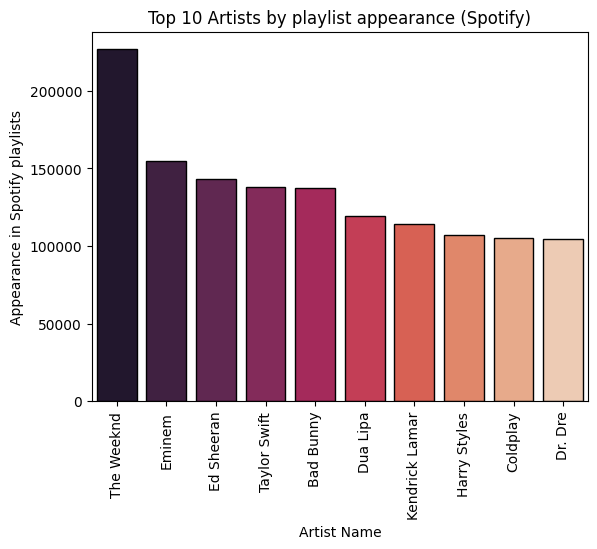

In [175]:
sns.barplot(x = 'artist(s)_name',
            y = 'in_spotify_playlists',
            data = top_10_spot_pl,
            palette = 'rocket',
           edgecolor = 'black')

plt.title('Top 10 Artists by playlist appearance (Spotify)')
plt.xlabel('Artist Name')
plt.ylabel('Appearance in Spotify playlists')
plt.xticks(rotation = 90)
plt.show()

# <font color="blue"> Top 10 Artists by playlist appearance (Apple)</font>

In [30]:
apple_play = exploded_df.groupby('artist(s)_name')['in_apple_playlists'].sum().reset_index()
sorted_apple_play = apple_play.sort_values(by = 'in_apple_playlists', ascending = False)
top_10_app_pl = sorted_apple_play.head(10)

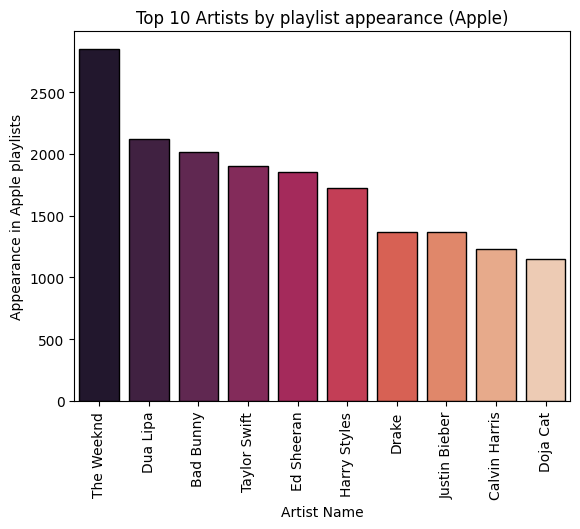

In [176]:
sns.barplot(x = 'artist(s)_name',
            y = 'in_apple_playlists',
            data = top_10_app_pl,
            palette = 'rocket',
           edgecolor = 'black')

plt.title('Top 10 Artists by playlist appearance (Apple)')
plt.xlabel('Artist Name')
plt.ylabel('Appearance in Apple playlists')
plt.xticks(rotation = 90)
plt.show()

# <font color="blue"> How is the trend of music features over the years for the songs in the list?</font>

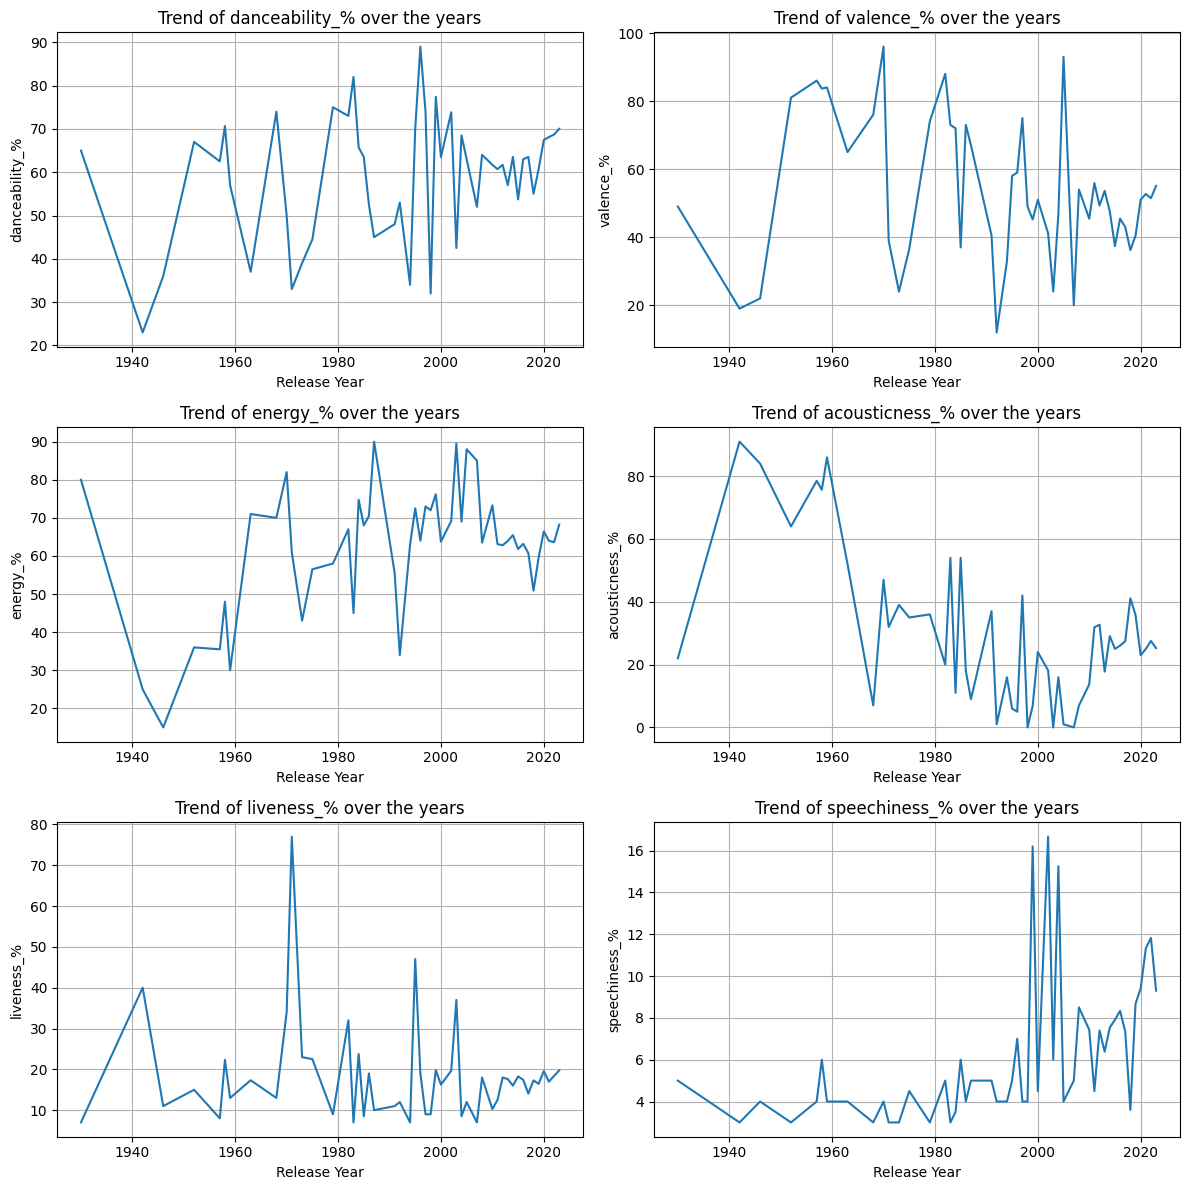

In [201]:
# create a list of music features
audio_features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'liveness_%', 'speechiness_%']
# calculate mean of the features for each year
audio_features_by_year = df.groupby('released_year')[audio_features].mean().reset_index()

plt.figure(figsize=(12, 12))
for i,feature in enumerate(audio_features, start=1):
    plt.subplot(3, 2, i) 
    sns.lineplot(x = 'released_year',
             y = feature,
             data = audio_features_by_year)
    plt.xlabel('Release Year')
    plt.ylabel(feature)
    plt.title(f'Trend of {feature} over the years')
    plt.grid(True)
    
plt.tight_layout()    
plt.show()

# <font color="blue"> How is the trend of BPM over the years for the songs in the list?</font>

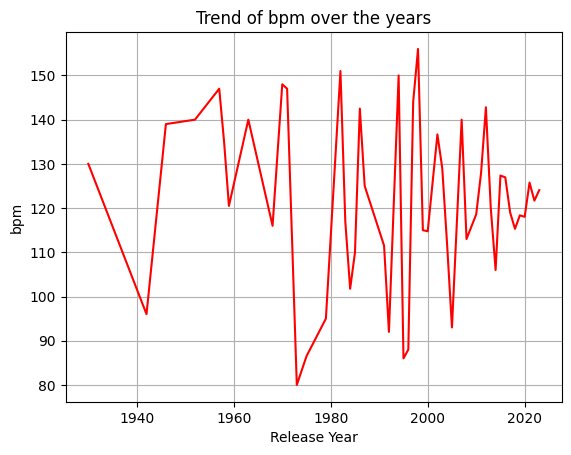

In [203]:
# calculate mean of bpm for different release years
bpm_df = df.groupby('released_year')['bpm'].mean().reset_index()
sns.lineplot(x = 'released_year',
             y = 'bpm',
             data = bpm_df,
            color = 'red')
plt.xlabel('Release Year')
plt.ylabel('bpm')
plt.title('Trend of bpm over the years')
plt.grid(True)
plt.show()

# <font color="blue"> How is the average BPM for different sets of top tracks?</font>

In [90]:
# create dataframes for each subset of top tracks
top_100_tracks = df.nlargest(100, 'streams')
top_200_tracks = df.nlargest(200, 'streams')
top_10_tracks = df.nlargest(10, 'streams')
top_50_tracks = df.nlargest(50, 'streams')
top_800_tracks = df.nlargest(800, 'streams')
top_500_tracks = df.nlargest(500, 'streams')

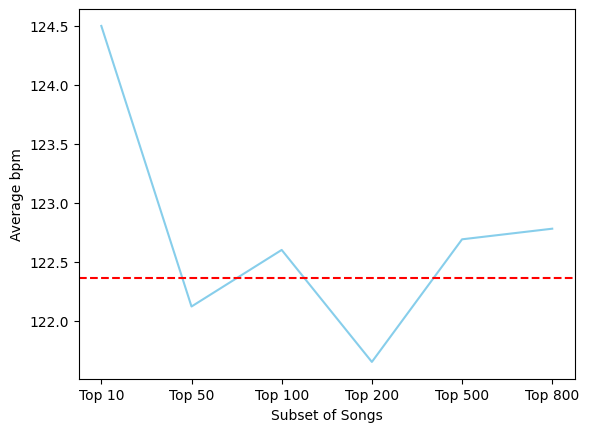

In [191]:
#create a list of dataframes
list_of_dfs = [top_10_tracks,top_50_tracks,top_100_tracks,top_200_tracks,top_500_tracks,top_800_tracks]

# loop overthe dataframes, and for each one calculate the mean of bpm and append the result to the means list
means = []
for i in list_of_dfs:
    mean = i['bpm'].mean()
    means.append(mean)
means

labels = ['Top 10', 'Top 50', 'Top 100', 'Top 200', 'Top 500', 'Top 800']
plt.plot(labels, means, color='skyblue')
plt.xlabel('Subset of Songs')
plt.ylabel('Average bpm')

# create a reference line with the average value of bpm so it becomes easier to compare the values
mean_bpms = df['bpm'].mean()
plt.axhline(y=mean_bpms, color='red', linestyle='--', label='Mean')

plt.show()

 # <font color="blue"> Whose songs are more dancable among the artists with 10 most streams?</font>

In [117]:
# create a list of top 10 artists with most streams
top = top_10_artists_streams['artist(s)_name']
top_10_a = top.tolist()
top_10_a

['Bad Bunny',
 'The Weeknd',
 'Ed Sheeran',
 'Taylor Swift',
 'Harry Styles',
 'Eminem',
 'Dua Lipa',
 'Justin Bieber',
 'Drake',
 'BTS']

In [130]:
# filter the dataframe to only include the tracks of top artists
filtered_df = exploded_df[exploded_df['artist(s)_name'].isin(top_10_a)]

In [189]:
#calculate the mean danceability of the songs 
grouped_f = filtered_df.groupby('artist(s)_name')['danceability_%'].mean().reset_index()
category_dtype = pd.CategoricalDtype(categories= top_10_a, ordered=True)
grouped_f['artist(s)_name'] = grouped_f['artist(s)_name'].astype(category_dtype)
grouped_f_sorted = grouped_f.sort_values(by='artist(s)_name')

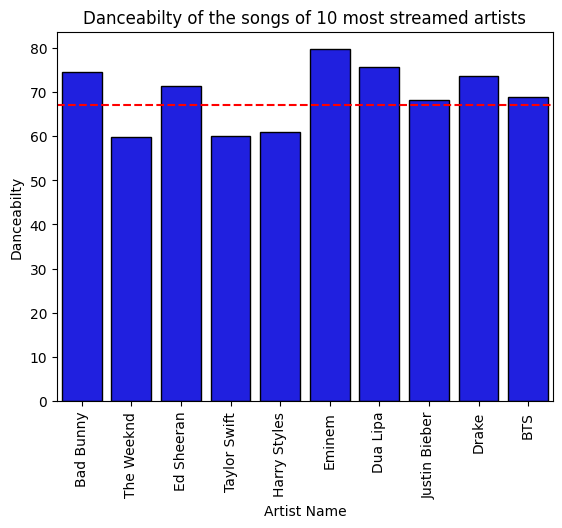

In [190]:
sns.barplot(x = 'artist(s)_name',
            y = 'danceability_%',
            data = grouped_f,
            color = 'blue',
           edgecolor = 'black')

plt.title('Danceabilty of the songs of 10 most streamed artists')
plt.xlabel('Artist Name')
plt.ylabel('Danceabilty')
plt.xticks(rotation = 90)

#calculate the mean of danceability of all songs to add a reference line to be able to compare the values
mean_value = df['danceability_%'].mean()

plt.axhline(y=mean_value, color='red', linestyle='--', label='Mean')

plt.show()

# <font color="#82077e"> Analysis of Taylor Swift Songs</font>

# <font color="blue"> How is the trend of BPM for Taylor songs based on their release year?</font>

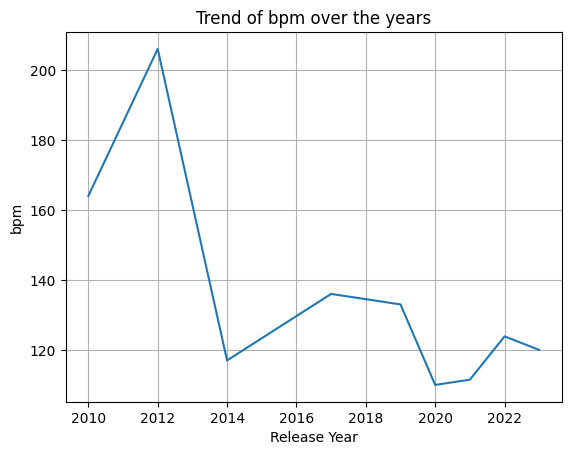

In [193]:
taylor_bpm = taylor_songs.groupby('released_year')['bpm'].mean().reset_index()
sns.lineplot(x = 'released_year',
             y = 'bpm',
             data = taylor_bpm )
plt.xlabel('Release Year')
plt.ylabel('bpm')
plt.title('Trend of bpm over the years')
plt.grid(True)
plt.show()

# <font color="blue"> On which platform are Taylor songs more popular? </font>

In [154]:
# we need to convert the in_deezer_playlist from object to numeric value to use it in calculation
taylor_songs['in_deezer_playlists']= pd.to_numeric(taylor_songs['in_deezer_playlists'], errors='coerce')
# there is one row with not numeric value
taylor_songs[taylor_songs['in_deezer_playlists'].isna()]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
176,Shake It Off,Taylor Swift,1,2014,1,1,21335,13,1113838873,328,...,160,G,Major,65,95,80,5,0,41,16


In [155]:
# filter this song out
taylor_songs = taylor_songs[taylor_songs['track_name'] != "Shake It Off)"]

In [166]:
t_s = taylor_songs[['in_spotify_playlists','in_apple_playlists','in_deezer_playlists']].sum()
t_s_l = t_s.tolist()
labels = ['Spotify','Apple', 'Deezer']

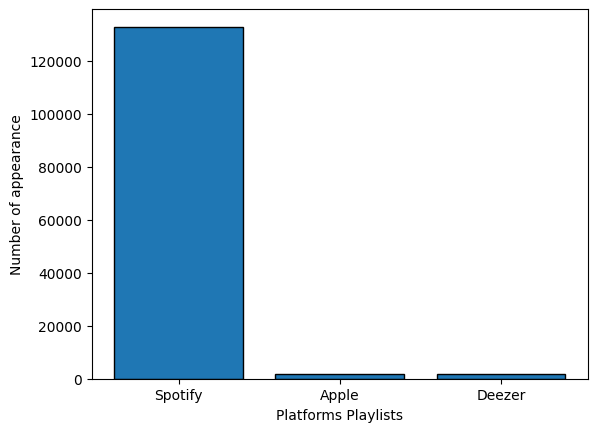

In [177]:
plt.bar(labels, t_s_l,edgecolor = 'black')
plt.xlabel('Platforms Playlists')
plt.ylabel('Number of appearance')
plt.show()

# <font color="blue"> What is the most used key for Taylor's songs?</font>

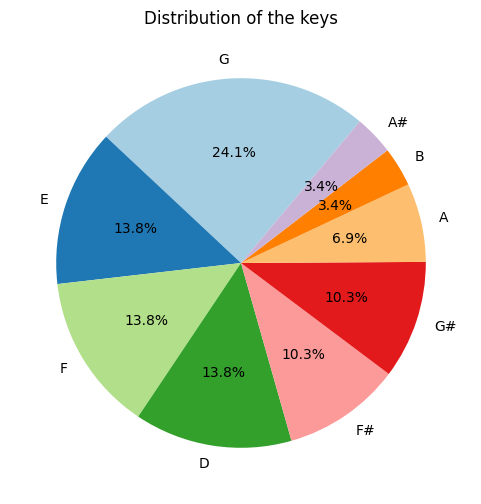

In [198]:
count_of_keys_t = taylor_songs['key'].value_counts().reset_index()
labels = count_of_keys_t['key']
sizes = count_of_keys_t['count']
custom_palette = sns.color_palette("Paired")
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle= 50, colors=custom_palette)
plt.title('Distribution of the keys')

plt.show()